In [3]:
import os
import sys
import json
import itertools

import json
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['figure.constrained_layout.use'] = True

In [4]:
colors = {
        'ColgeIM': 'darkorchid',
        'A': 'darkorchid',
        'B': 'darkorchid',
        'C': 'deeppink',
        'D': 'olive',
        'E': 'teal',
        'F': 'darkorange',
        'G': 'purple',
        'H': 'royalblue',
        'I': 'orangered',
        'J': 'dodgerblue',
        'K': 'chocolate',
        'L': 'turquoise',
        'M': 'green',
        'N': 'black',
        'O': 'red',
        'P': 'cyan',
        'Q': 'teal',
        'R': 'cyan',
        'S': 'turquoise',
        'T': 'slateblue',
}

In [5]:
def convert_labels(labels):
    for i, label in enumerate(labels):
        if label == '500K':
            labels[i] = '0.5M'
        if label == '1000K':
            labels[i] = '1M'
    return labels

In [6]:
#script to process train/valiation results 
data_root = "../data/run_data/Feb15/sacred"


# graph_info.json is available in each folder
#with open(os.path.join('../data/run_data/graph_info', 'graph_info.json')) as f:
    # key: graph name
    # value: graph node size
    #graph_info = json.load(f)


#runs = [358, 357, 317, 318, 365] #RL4IM Exp 2.1
#runs = [347, 348, 359, 349, 350] #BaseRL Exp 2.1

#runs = [10007, 10008, 10009, 10010, 10011, 10012] #RL4IM Exp 3.1 #note: 10 needs retraining
runs = [10013, 10014, 10015, 10016, 10017, 10018]
 
colge_im_graph_info = {}
colge_im_config = {}
colge_im_raw = {}
colge_im = {}


for r in runs:
    with open(os.path.join(data_root, str(r), 'graph_info.json')) as f:
        colge_im_graph_info[r] = json.load(f)

for r in runs:
    with open(os.path.join(data_root, str(r), 'eval_episode_rewards.json')) as f:
        colge_im_raw[r] = json.load(f)

for r in runs:
    with open(os.path.join(data_root, str(r), 'config.json')) as f:
        colge_im_config[r] = json.load(f)

for r in runs:
    key = list(colge_im_raw[r].keys())[0]
    #print(np.array(colge_im_raw[r][key]).shape)


for r in runs:
    key = list(colge_im_raw[r].keys())
    #print(key)
    

for r in runs:
    colge_im[r] = {}
    graphs = list(colge_im_raw[r].keys())
    #print(f'r: {r}, graphs: {graphs}')
    
    for graph in graphs:
        #print(np.array(colge_im_raw[r][graph]).shape)
        colge_im[r][graph] = {}
        colge_im[r][graph]['mean_std'] = (np.mean(colge_im_raw[r][graph], axis=1), np.std(colge_im_raw[r][graph], axis=1))
        colge_im[r][graph]['normalized'] = np.array(colge_im_raw[r][graph]) 
        #/ float(colge_im_graph_info[r][graph])
        
        cap_from = int(np.ceil(1000 / colge_im_config[r]['T'] / colge_im_config[r]['save_every']))
        cap_to = int(np.ceil(2000 / colge_im_config[r]['T'] / colge_im_config[r]['save_every']))
        #print(f'----> {pivot}')
        colge_im[r][graph]['normalized_stable_epsilon'] = colge_im[r][graph]['normalized'][cap_from:cap_to, :]
        #max_step = cap_from * colge_im_config[r]['T'] * colge_im_config[r]['save_every']
        
        
    for graph in graphs:
        #colge_im[r]['cat_norm'] = np.mean(np.concatenate([colge_im[r][graph]['normalized'] for graph in graphs], axis=1), axis=1)
        colge_im[r]['cat_norm'] = np.mean(np.concatenate([colge_im[r][graph]['normalized_stable_epsilon'] for graph in graphs], axis=1), axis=1)
    opt_id = np.argmax(colge_im[r]['cat_norm'])
    opt_checkpoint = (opt_id +1 + cap_from)*colge_im_config[r]['T']*colge_im_config[r]['save_every']
    max_value = np.max(colge_im[r]['cat_norm'])
    print('r:', r)
    print('capped normalized influence vector size is: ', colge_im[r]['cat_norm'].shape)
    print('opt id is:', opt_id)
    print('opt_checkpoint is: ', opt_checkpoint)
    print('max value is: ', max_value)
    #print('capped normalized influence vector: ',colge_im[r]['cat_norm'])
        

r: 10013
capped normalized influence vector size is:  (41,)
opt id is: 33
opt_checkpoint is:  1824
max value is:  0.27774089676007313
r: 10014
capped normalized influence vector size is:  (41,)
opt id is: 14
opt_checkpoint is:  1368
max value is:  0.2903522845608859
r: 10015
capped normalized influence vector size is:  (41,)
opt id is: 4
opt_checkpoint is:  1128
max value is:  0.2834303427377966
r: 10016
capped normalized influence vector size is:  (41,)
opt id is: 16
opt_checkpoint is:  1416
max value is:  0.27724633972870055
r: 10017
capped normalized influence vector size is:  (41,)
opt id is: 39
opt_checkpoint is:  1968
max value is:  0.31215442208694655
r: 10018
capped normalized influence vector size is:  (41,)
opt id is: 1
opt_checkpoint is:  1056
max value is:  0.2870493474827291


In [7]:
#script to process test results
data_root = "../data/run_data/Feb15/sacred"
test_influence = { }

#runs = [360, 361, 389, 363, 364] #RL4IM Exp 2.1.1
#runs = [371, 372, 373, 374, 375] #baseRL Exp 2.2.1
#runs = [352, 353, 354, 355, 356] #random Exp 2.4
runs = [10001, 10002, 10003, 10004, 10005]


for r in runs:
    with open(os.path.join(data_root, str(r), 'test_mode_results.json')) as f:
        test_influence[r] = json.load(f)
    #print('r:',r)
    #print(test_influence[r]['episode_accumulated_rewards'])
    #print('mean:', np.mean(test_influence[r]['episode_accumulated_rewards']))
    #print('std: ', np.std(test_influence[r]['episode_accumulated_rewards']))
    mean = np.mean(test_influence[r]['episode_accumulated_rewards'])
    std = np.std(test_influence[r]['episode_accumulated_rewards'])
    print(mean)


FileNotFoundError: [Errno 2] No such file or directory: '../data/run_data/Feb15/sacred/10001/test_mode_results.json'

In [138]:
#print(colge_im_config[270]['T'])
#print(colge_im_config[270]['epsilon_decay_steps'])

In [112]:
#np.array(colge_im_raw[273]['100000']).shape

In [113]:
#colge_im[273]['cat_norm'].shape

In [114]:
#colge_im[273]['100000']['normalized_stable_epsilon'].shape

In [115]:
def plot_algo(ax, algo_name, algo_label, algo_mean, algo_std, lw, alpha=0.3):
    ax.plot(range(len(algo_mean)), algo_mean, label=algo_label, lw=lw, color=colors[algo_name])
    ax.fill_between(range(len(algo_mean)), 
                    algo_mean+algo_std, 
                    algo_mean-algo_std,
                    facecolor=colors[algo_name], 
                    alpha=alpha)

In [116]:
def plot_figures(graphs, runs, data, plot_legend=True):
    fig = plt.figure()
    lw = 1
    # fig.subplots_adjust(hspace=0.4, wspace=0.4)
    col = 5   # graph name
    nrows = 5  # runs
    alpha_shade = 0.18

    fig, axes = plt.subplots(nrows=nrows, ncols=col, figsize=(25,20))
    for i in range(nrows):
        for j in range(col):
            if col == 1:
                ax = axes
            else:
                if nrows == 1:
                    ax = axes[j]
                else:
                    ax = axes[i][j]
            idx = i*col+j
            
            graph_name = graphs[idx]
            
            print(f'{"-"*10} plotting {graph_name}, index: {idx} {"-"*10}')
            
            mean, std = data[runs[i]][graph_name]['mean_std']

            plot_algo(ax, algo_name='ColgeIM', algo_label='ColgeIM', algo_mean=mean, algo_std=std, lw=lw, alpha=0.3)
            
            #ax.set_ylim([0, 1.05])

            if idx < 22:
                handles, labels = ax.get_legend_handles_labels()

            if i == 1:
                ax.set_xlabel('Steps', fontsize=12)
            if j == 0:
                ax.set_ylabel('Rewards', fontsize=12)

            #ax.set_xlabel('Training Steps', fontsize=7)
            #ax.set_ylabel('Mean Test Won Rate', fontsize=7)
            #ax.legend(fontsize=10, frameon=True, loc='upper left', facecolor='white', framealpha=0.9, edgecolor='white')
            
            ax.spines['right'].set_visible(True)
            ax.spines['top'].set_visible(True)
            ax.grid(color='grey', ls = ':', lw=0.5)

            #ax.spines['right'].set_color((.5,.5,.5))
            #ax.spines['top'].set_color((.9,.9,.9))

            default_xticks_range = 50
            pivot_len = len(mean) + 5
            if pivot_len > 200:
                default_xticks_range = 50
                xlabels = ['{}'.format(x if int(x)!= x else int(x)) + ('M' if x !=0 else '') 
                       for x in np.array(range(0, pivot_len, default_xticks_range))/100.]
            else:
                default_xticks_range = 50
                if 50 <= pivot_len <= 110:
                    default_xticks_range = 20
                    if pivot_len > 100:
                        default_xticks_range = 20
                    xlabels = ['{}'.format(x if int(x)!= x else int(x)) + ('0K' if x !=0 else '') 
                           for x in np.array(range(0, pivot_len, default_xticks_range))]     
                else:
                    xlabels = ['{}'.format(x if int(x)!= x else int(x)) + ('M' if x !=0 else '') 
                           for x in np.array(range(0, pivot_len, default_xticks_range))/100.]

            #print(xlabels)
            #ax.set_xticks(np.array(range(0, pivot_len, default_xticks_range)))
            #ax.set_xticklabels(convert_labels(xlabels))

            #ax.set_yticks([0, 25, 50, 75, 100])
            #print(ax.get_xticks())

            ax.xaxis.set_tick_params(labelsize=10)
            ax.yaxis.set_tick_params(labelsize=10)
            if plot_legend and idx == 0:
                legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=12, ncol=12, frameon=False)
                # legend = ax.legend(fontsize=6, frameon=False)
                for line in legend.get_lines():
                    line.set_linewidth(3)
            ax.set_title(f'graph name: {graph_name}', fontsize=12)
    
    os.makedirs('./images', exist_ok=True)
    plt.savefig(f'./images/demo.pdf', bbox_inches='tight')

---------- plotting 100000, index: 0 ----------


ValueError: too many values to unpack (expected 2)

<Figure size 1800x1200 with 0 Axes>

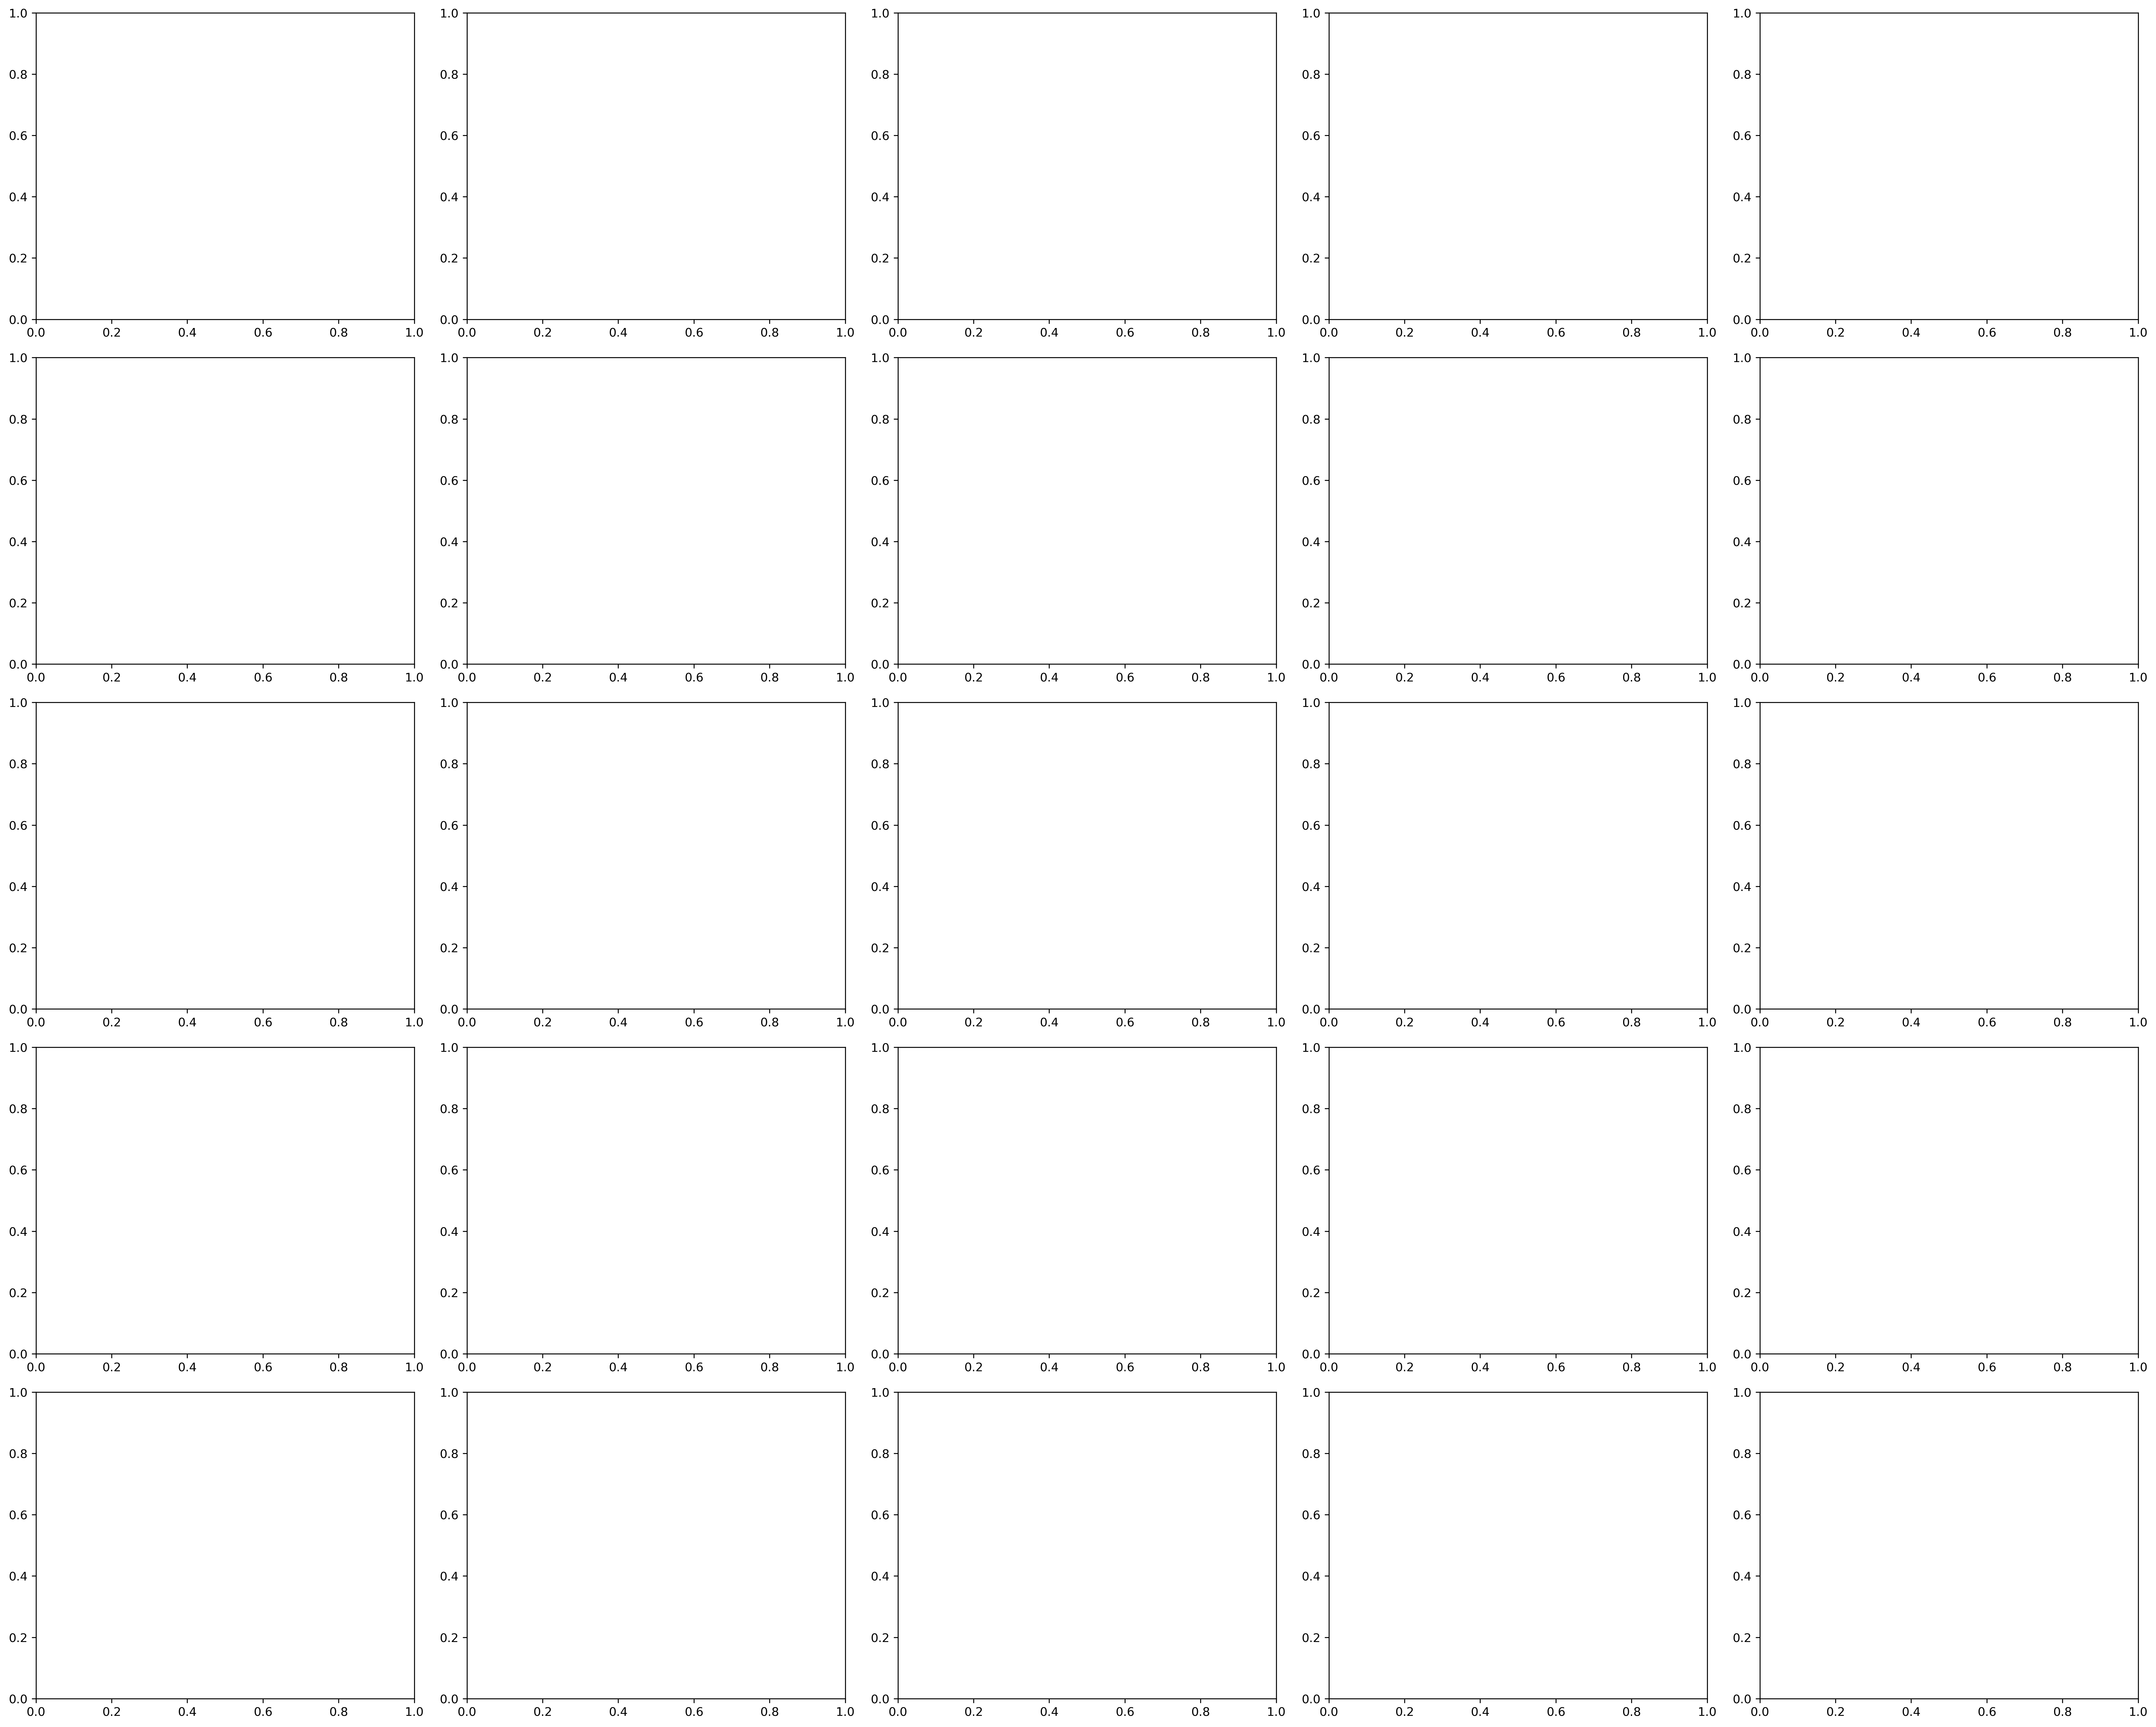

In [108]:
graphs = list(itertools.chain(*[list(colge_im[r].keys()) for r in runs]))
plot_figures(graphs, runs, colge_im, plot_legend=True)

In [5]:
def plot_single_figures(data, graph_name, plot_legend=True):
    fig = plt.figure()
    lw = 1
    # fig.subplots_adjust(hspace=0.4, wspace=0.4)
    col = 5   # graph name
    nrows = 5  # runs
    alpha_shade = 0.18

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))

    mean, std = data

    plot_algo(ax, algo_name='ColgeIM', algo_label='ColgeIM', algo_mean=mean, algo_std=std, lw=lw, alpha=0.3)


    ax.set_xlabel('Steps', fontsize=12)
    ax.set_ylabel('Rewards', fontsize=12)

    #ax.set_xlabel('Training Steps', fontsize=7)
    #ax.set_ylabel('Mean Test Won Rate', fontsize=7)
    #ax.legend(fontsize=10, frameon=True, loc='upper left', facecolor='white', framealpha=0.9, edgecolor='white')

    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.grid(color='grey', ls = ':', lw=0.5)

    #ax.spines['right'].set_color((.5,.5,.5))
    #ax.spines['top'].set_color((.9,.9,.9))

    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)
    if plot_legend and idx == 0:
        legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), fontsize=12, ncol=12, frameon=False)
        # legend = ax.legend(fontsize=6, frameon=False)
        for line in legend.get_lines():
            line.set_linewidth(3)
    ax.set_title(f'graph name: {graph_name}', fontsize=12)
    
    os.makedirs('./images', exist_ok=True)
#     plt.savefig(f'./images/demo.pdf', bbox_inches='tight')